In [1]:
import quandl
import pandas as pd
import numpy as np
import datetime

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

C:\Users\Priti\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import matplotlib.pyplot as plt

In [4]:
df = quandl.get("WIKI/GOOGL")
print(df.tail())

               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1092.57  1108.70  1087.21  1094.00  1990515.0          0.0   
2018-03-22  1080.01  1083.92  1049.64  1053.15  3418154.0          0.0   
2018-03-23  1051.37  1066.78  1024.87  1026.55  2413517.0          0.0   
2018-03-26  1050.60  1059.27  1010.58  1054.09  3272409.0          0.0   
2018-03-27  1063.90  1064.54   997.62  1006.94  2940957.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1092.57    1108.70   1087.21     1094.00   
2018-03-22          1.0    1080.01    1083.92   1049.64     1053.15   
2018-03-23          1.0    1051.37    1066.78   1024.87     1026.55   
2018-03-26          1.0    1050.60    1059.27   1010.58     1054.09   
2018-03-27          1.0    1063.90    1064.54    997.62

In [5]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')


In [6]:
print(df.index)

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=3424, freq=None)


In [7]:
df = df[['Adj. Open','Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [8]:
# define a new feature, HL_PCT
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low'])/(df['Adj. Low']*100)

In [9]:
# define a new feature percentage change
df['PCT_CHNG'] = (df['Adj. Close'] - df['Adj. Open'])/(df['Adj. Open']*100)

In [10]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_CHNG', 'Adj. Volume']]

In [11]:
print(df.head(1))

            Adj. Close    HL_PCT  PCT_CHNG  Adj. Volume
Date                                                   
2004-08-19   50.322842  0.000844  0.000032   44659000.0


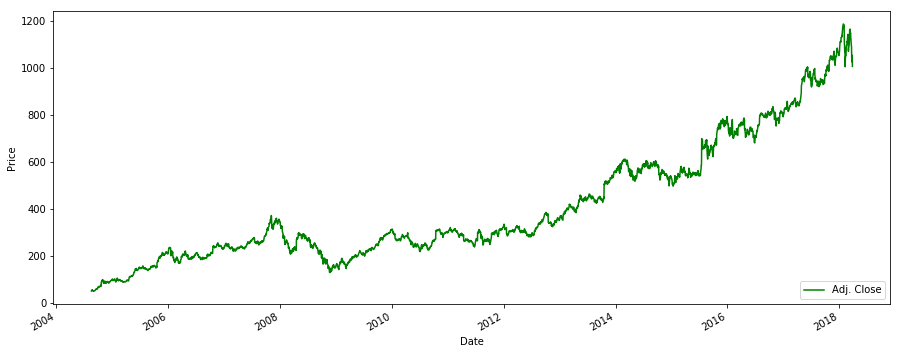

In [12]:
df['Adj. Close'].plot(figsize=(15,6), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

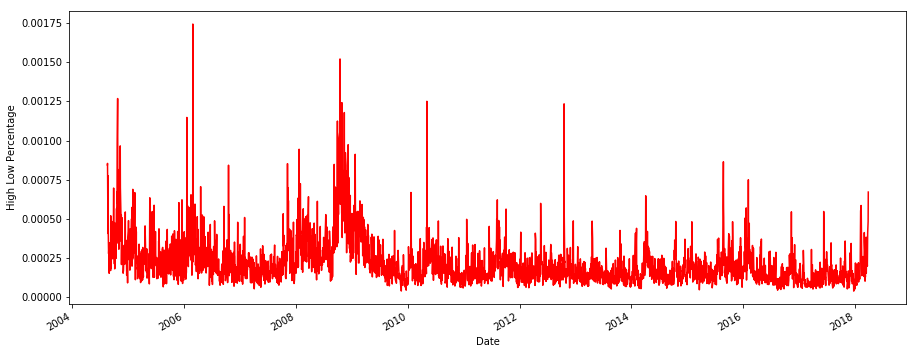

In [13]:
df['HL_PCT'].plot(figsize=(15,6), color="red")
plt.xlabel('Date')
plt.ylabel('High Low Percentage')
plt.show()

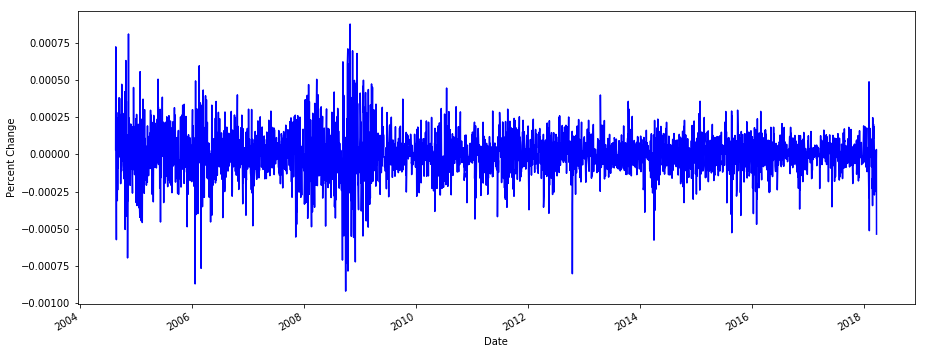

In [14]:
df['PCT_CHNG'].plot(figsize=(15,6), color="blue")
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.show()

In [15]:
df = df[['Adj. Close']]

In [16]:
forecast_out = int(15) #Predicting for the next 15 days

In [17]:
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out) # label column with datashifted 30 units up
print(df.tail())

            Adj. Close  Prediction
Date                              
2018-03-21     1094.00         NaN
2018-03-22     1053.15         NaN
2018-03-23     1026.55         NaN
2018-03-26     1054.09         NaN
2018-03-27     1006.94         NaN


In [18]:
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [20]:
X_forecast = X[-forecast_out:] # setX_forecast equal to last 15
X = X[:-forecast_out] # remove last 15 from X

In [22]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [23]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [24]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9885224307726221


In [27]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[1126.19305188 1140.66889663 1172.42692144 1177.56513969 1151.29864874
 1160.36371748 1162.10001127 1145.75664123 1111.08123906 1106.77078878
 1104.95373713 1063.71675959 1036.86477422 1064.66566434 1017.06900605]


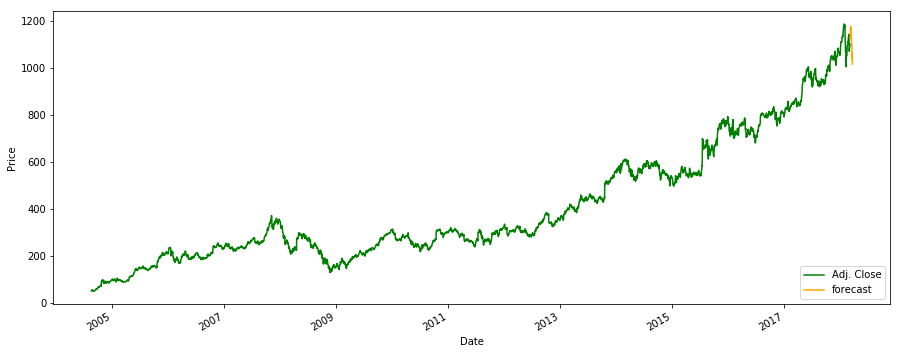

In [28]:
# Plotting data
df.dropna(inplace=True)
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

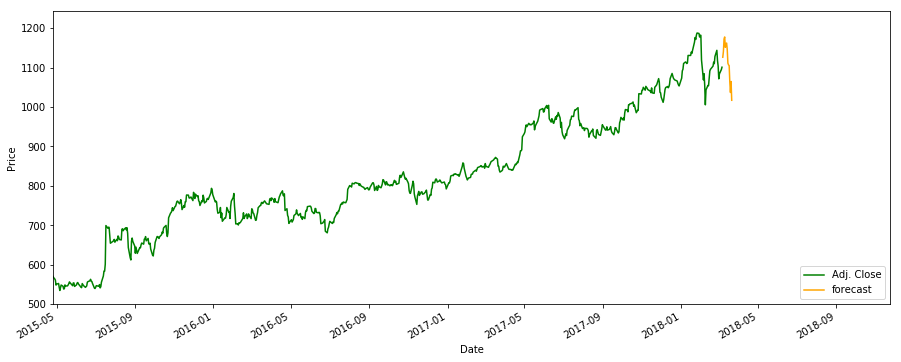

In [29]:
# Zoomed In to a year
df['Adj. Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.xlim(xmin=datetime.date(2015, 4, 26))
plt.ylim(ymin=500)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()